In [9]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

In [10]:
x0 = 0
x1 = 1

def init_random_params(scale, layer_sizes, rs=npr.RandomState(42)):
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

def tanh(x):
    return (2 / (1.0 + np.exp(-2*x))) - 1

def psi(nnparams, inputs):
    layerLen = len(nnparams)
    origInput = inputs
    
    for ind, (W, b) in enumerate(nnparams):
        outputs = np.dot(inputs, W) + b
        if ind != layerLen - 1 :
            inputs = tanh(outputs)    
            
    xTilde = (origInput - x0)/(x1-x0)
    #print ("xtilde shape = " + str(xTilde.shape))
    return (1 - np.exp(xTilde * (1-xTilde))) * outputs

dpsi = elementwise_grad(psi, 1) # dpsi/dx 
ddpsi = elementwise_grad(dpsi, 1) # d^2psi/dx^2

In [11]:
nnparams = init_random_params(0.1, layer_sizes=[1, 32, 1])
params = {'nn': nnparams, 'E': 5.0}

x = np.linspace(0, 1, 200)[:, None]

def objective(params, step):
    nnparams = params['nn']
    E = params['E']        
    # This is Schrodinger's eqn
    zeq = -(0.5*dpsi(nnparams, x)) - (E*dpsi(nnparams, x)) 
    
    y2 = psi(nnparams, x)**2
    # This is a numerical trapezoid integration
    prob = np.sum((y2[1:] + y2[0:-1]) / 2 * (x[1:] - x[0:-1]))
    return np.mean(zeq**2) + (1.0 - prob)**2

# This gives us feedback from the optimizer
def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))

In [12]:
params = adam(grad(objective), params,
              step_size=0.001, num_iters=5001, callback=callback) 

print(params['E'])

Iteration   0 objective 1.0587717250754958
Iteration 1000 objective 1.0000000086037955
Iteration 2000 objective 1.0000000085067822


KeyboardInterrupt: 

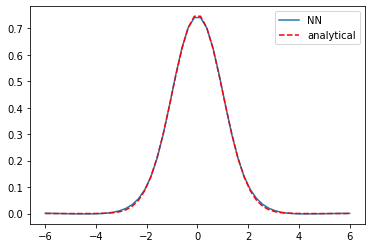

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-6, 6)[:, None]
y = psi(params['nn'], x)

plt.plot(x, y, label='NN')
plt.plot(x, (1/np.pi)**0.25 * np.exp(-x**2 / 2), 'r--', label='analytical')
plt.legend()

In [64]:
print(type(psi(nnparams,x)))
print (type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [72]:
print((x*(1-x)).shape)

(200, 1)
